In [1]:
#visualize end_to_end dataset as wavefield

In [35]:
from models.model_utils import fetch_data_end_to_end
from generate_data import wave_util
import matplotlib.pyplot as plt
import torch
from generate_data.wave_propagation import velocity_verlet_tensor, pseudo_spectral

delta_t_star = .06
dx = 2.0/128.0

#get data
path = "../data/end_to_end_bp_m_10_2000.npz"
loaders = fetch_data_end_to_end([path], shuffle=False, batch_size=1)

train data points: 10


0 ------------------------------------------------------------------------------------------------------------------------------------------------------


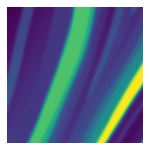

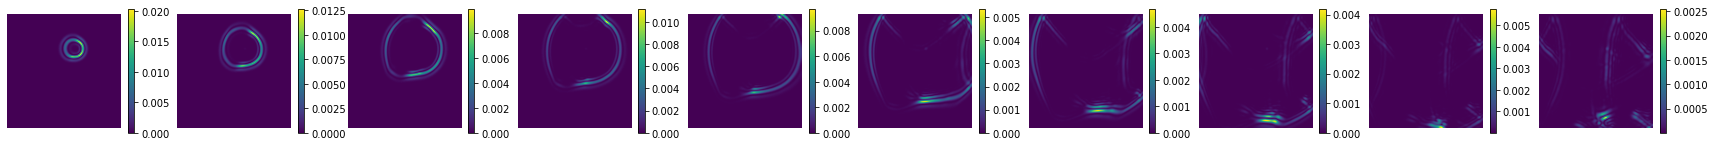

1 ------------------------------------------------------------------------------------------------------------------------------------------------------


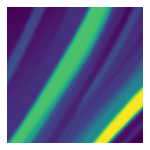

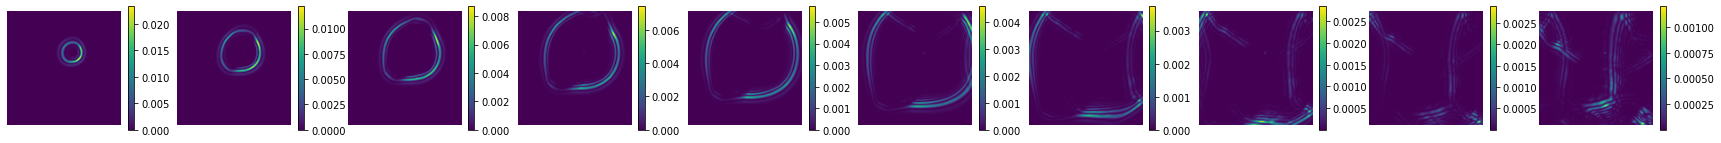

2 ------------------------------------------------------------------------------------------------------------------------------------------------------


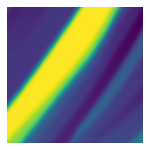

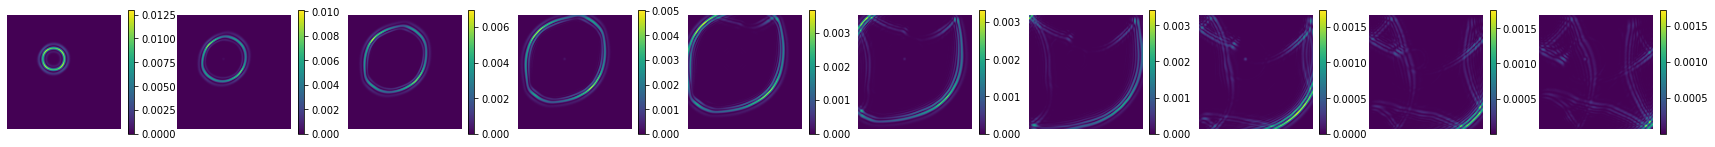

3 ------------------------------------------------------------------------------------------------------------------------------------------------------


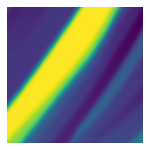

KeyboardInterrupt: 

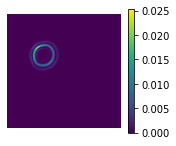

In [37]:
for loader in loaders:
    for i, data in enumerate(loader):
        print(i, "-"*150)

        input = data[0]  # b x n_snaps x c x w x h

        # velocity visualization
        plt.figure(figsize = (2.5,2.5))
        plt.imshow(input[0, 0, 3, :, :])
        plt.axis('off')
        plt.show()
        fig = plt.figure(figsize=(30,5))

        #input vis
        idx = 0
        u_x, u_y, u_t_c, vel = input[:,idx, 0, :, :], input[:,idx, 1, :, :], input[:,idx, 2, :, :], input[:,idx, 3, :, :]
        sumv = torch.sum(torch.sum(u_x))
        u, ut = wave_util.WaveSol_from_EnergyComponent_tensor(u_x, u_y, u_t_c, vel, dx, sumv)

        for idx in range(10):

            u, ut = velocity_verlet_tensor(u,ut,vel,dx,dx/20, delta_t_star,number=1, boundary_c="absorbing")

            ax1 = fig.add_subplot(2,10,idx+1)
            pos1 = ax1.imshow(wave_util.WaveEnergyField_tensor(u[0,:,:],ut[0,:,:],vel[0,:,:],dx)*dx*dx)
            plt.colorbar(pos1)
            plt.axis('off')

            # #label vis
            # u_x, u_y, u_t_c, vel = input[:,idx+1, 0, :, :], input[:,idx+1, 1, :, :], input[:,idx+1, 2, :, :], input[:,idx+1, 3, :, :]
            # sumv = torch.sum(torch.sum(u_x))
            # u, ut = wave_util.WaveSol_from_EnergyComponent_tensor(u_x, u_y, u_t_c, vel, dx, sumv)
            #
            # ax2 = fig.add_subplot(2,10,idx+11)
            # pos2 = ax2.imshow(wave_util.WaveEnergyField_tensor(u[0,:,:],ut[0,:,:],vel[0,:,:],dx)*dx*dx)
            # plt.colorbar(pos2)
            # plt.axis('off')


        plt.show()

In [ ]:
# visualize absorbing boundary conditions

import matplotlib.pyplot as plt
from generate_data import wave_propagation as wprop
import torch

xx,yy = torch.meshgrid(torch.linspace(-1, 1, 128), torch.linspace(-1, 1, 128))
u=torch.exp(-250 * ((xx) ** 2 + (yy) ** 2))#.unsqueeze(dim=0)
ut=torch.zeros([128,128])#.unsqueeze(dim=0)
vel = torch.ones(128, 128)#.unsqueeze(dim=0)

dx = 2.0/128.0
dt = dx / 20
cT = .06

for i in range(13):
    plt.imshow(wave_util.WaveEnergyField_tensor(u,ut,vel,dx))
    plt.show()
    u, ut = wprop.velocity_verlet_tensor(u, ut, vel,dx,dt,cT,boundary_c='periodic')

In [ ]:
# visualize velocity verlet differences
from models.model_utils import get_params, get_paths

data_paths, train_logger_path, valid_logger_path, dir_path_save = get_paths()
param_dict = get_params("0")



In [7]:
from models.model_utils import fetch_data_end_to_end, fetch_data
from generate_data import wave_util
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

delta_t_star = .2
dx = 2.0/128.0

#get data
path = "../data/bp_m_200_64_128small.npz"
loaders = fetch_data([path], shuffle=True, batch_size=1)

setting up data
total number of data points: 500


0 ------------------------------------------------------------------------------------------------------------------------------------------------------


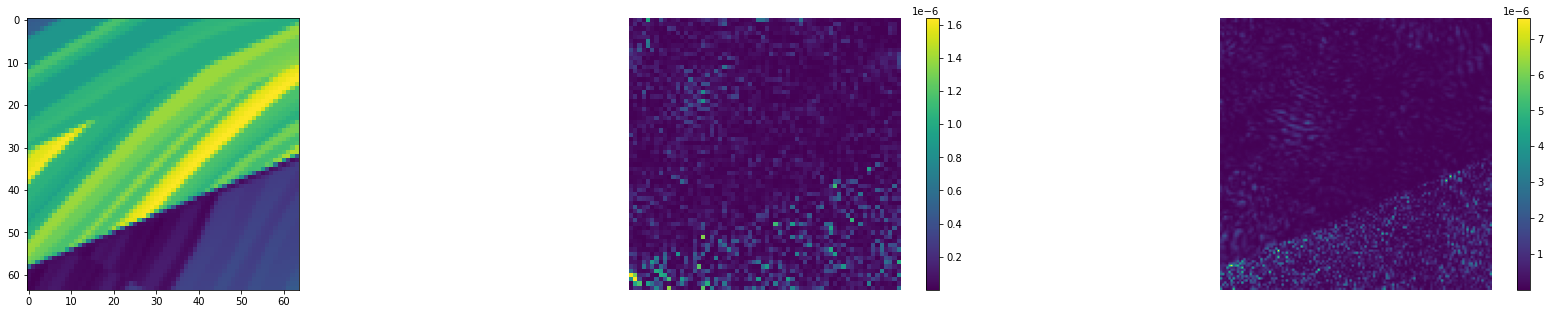

1 ------------------------------------------------------------------------------------------------------------------------------------------------------


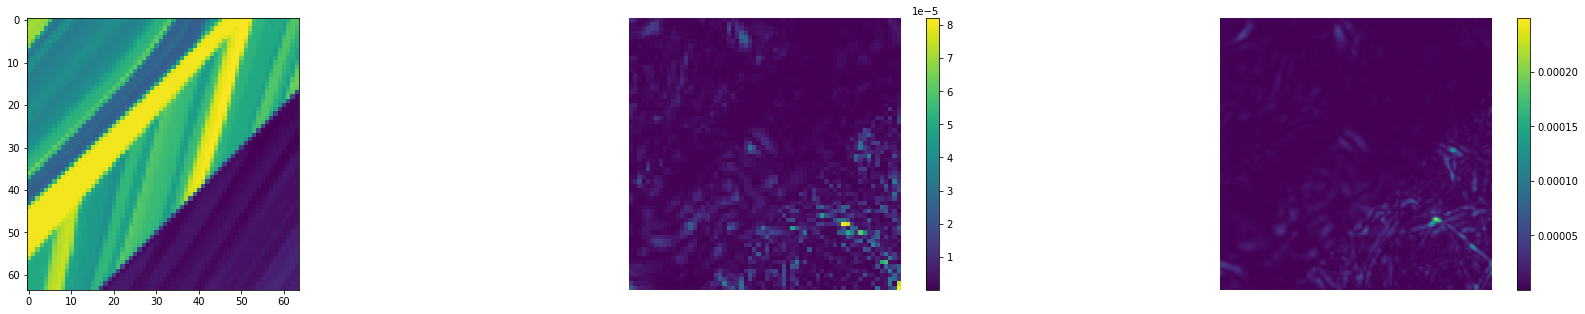

2 ------------------------------------------------------------------------------------------------------------------------------------------------------


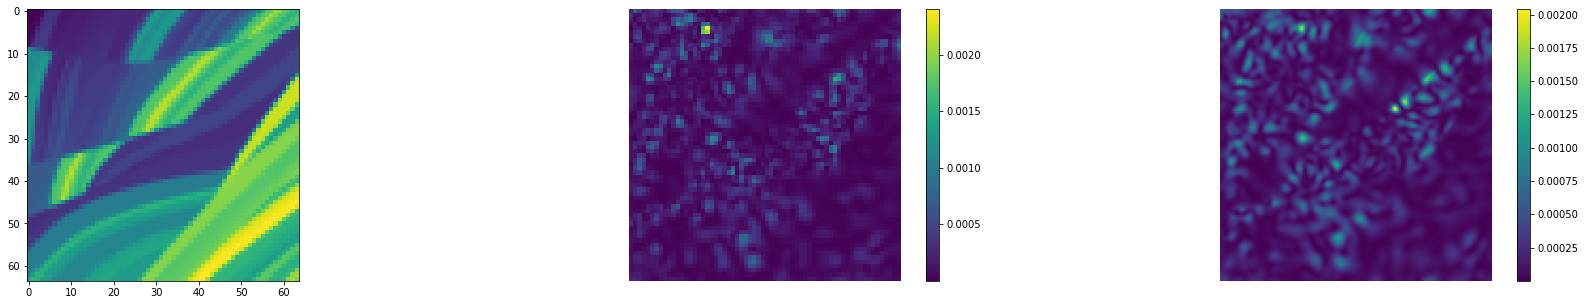

3 ------------------------------------------------------------------------------------------------------------------------------------------------------


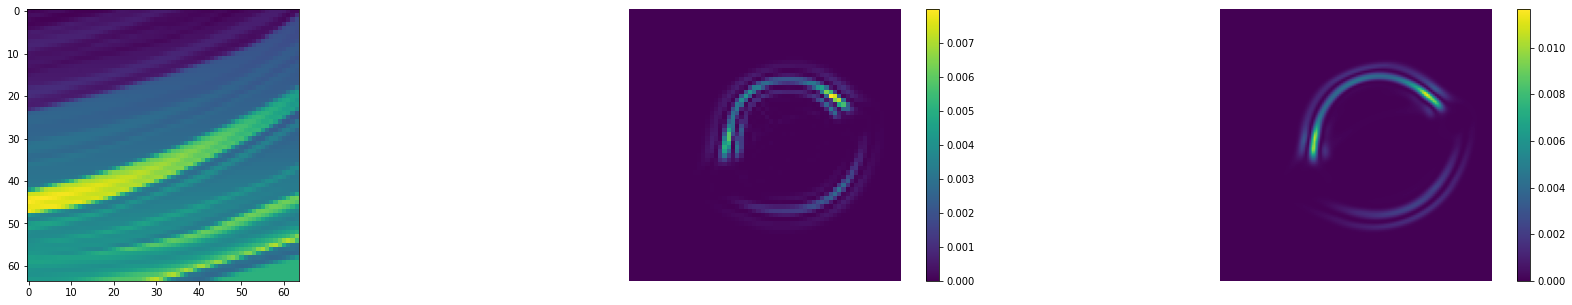

4 ------------------------------------------------------------------------------------------------------------------------------------------------------


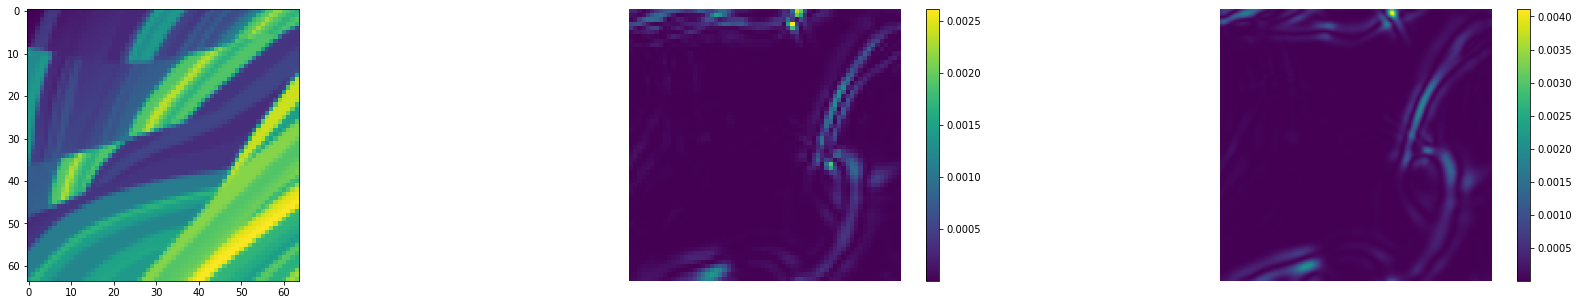

5 ------------------------------------------------------------------------------------------------------------------------------------------------------


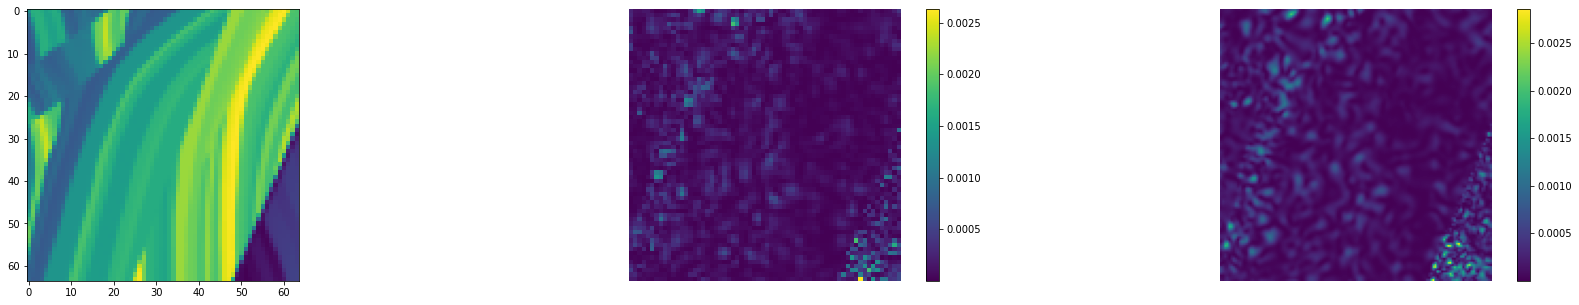

6 ------------------------------------------------------------------------------------------------------------------------------------------------------


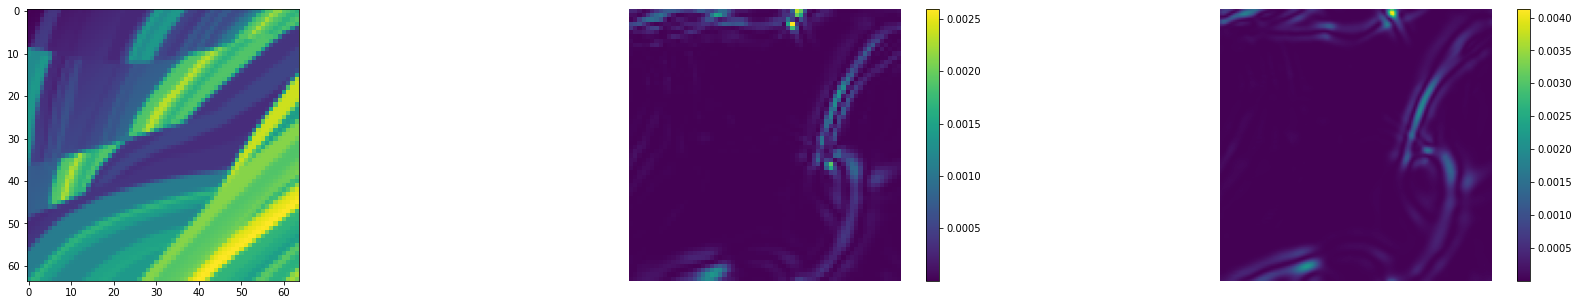

7 ------------------------------------------------------------------------------------------------------------------------------------------------------


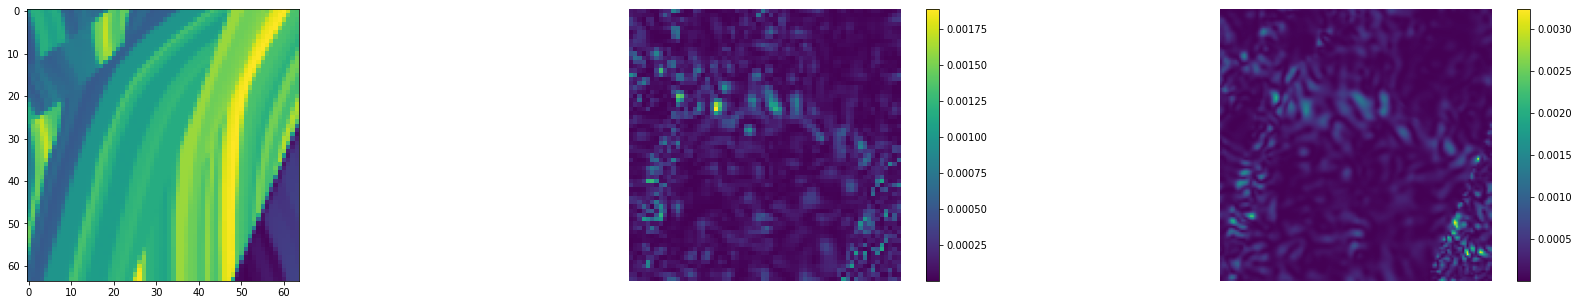

8 ------------------------------------------------------------------------------------------------------------------------------------------------------


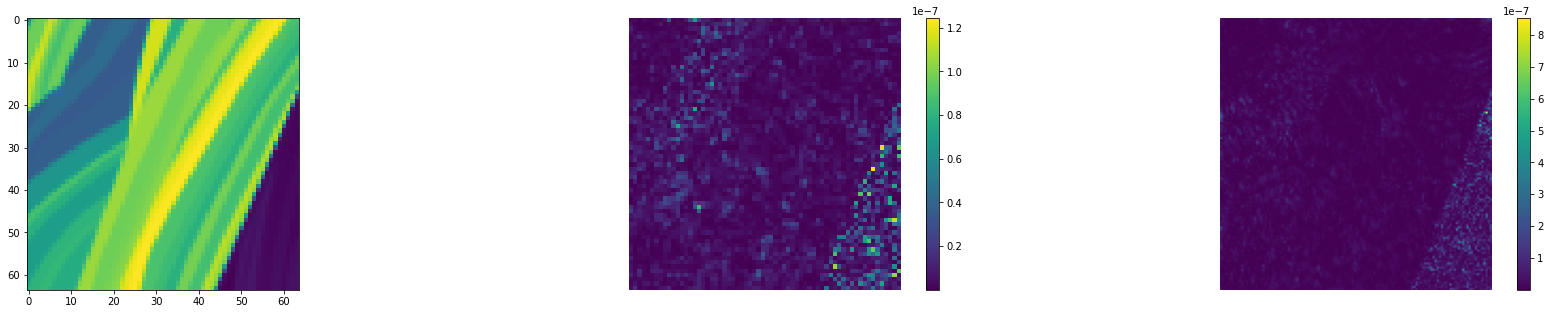

9 ------------------------------------------------------------------------------------------------------------------------------------------------------


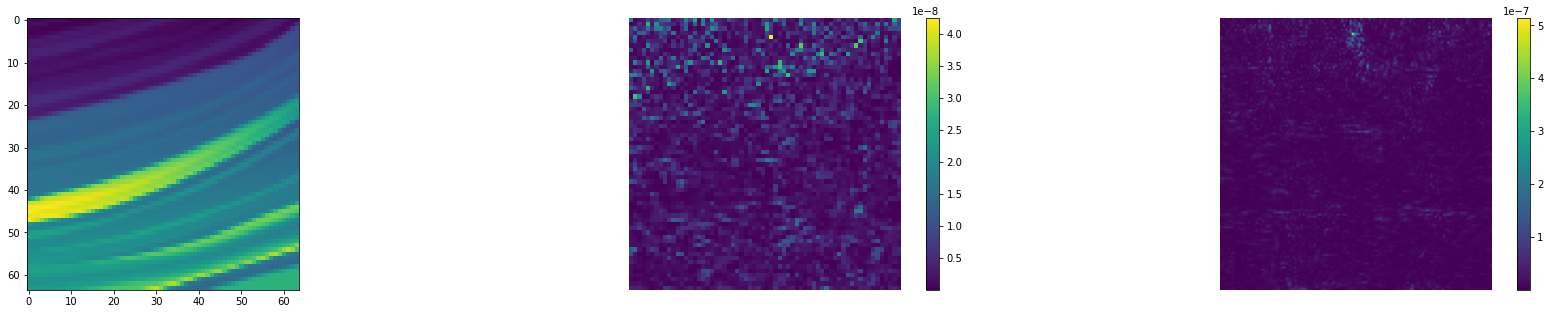

10 ------------------------------------------------------------------------------------------------------------------------------------------------------


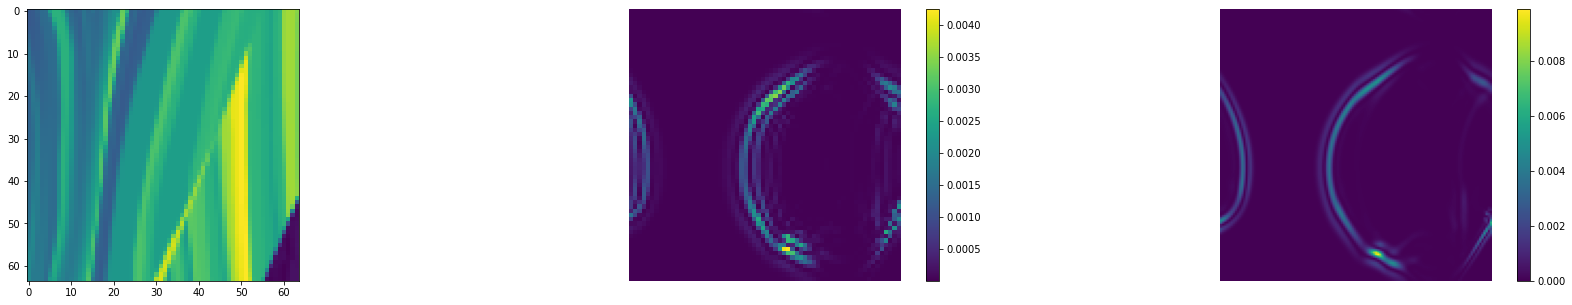

11 ------------------------------------------------------------------------------------------------------------------------------------------------------


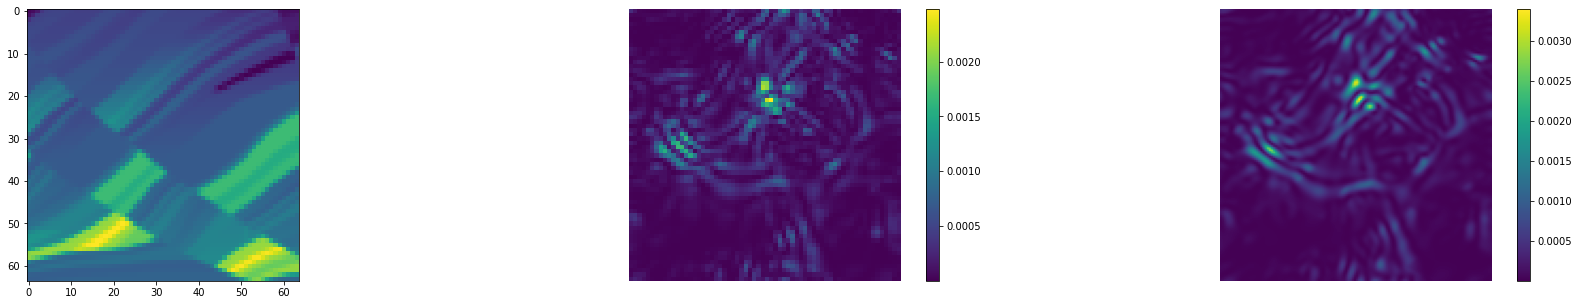

12 ------------------------------------------------------------------------------------------------------------------------------------------------------


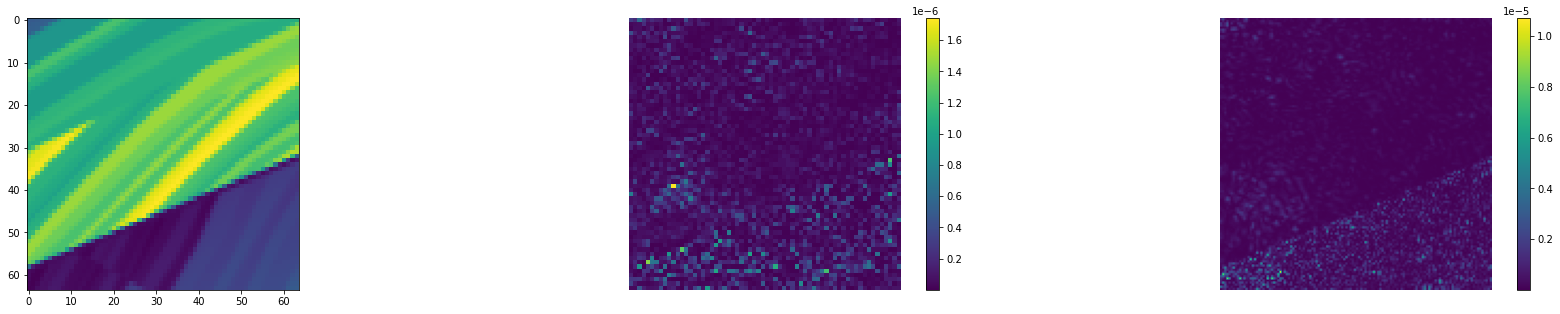

13 ------------------------------------------------------------------------------------------------------------------------------------------------------


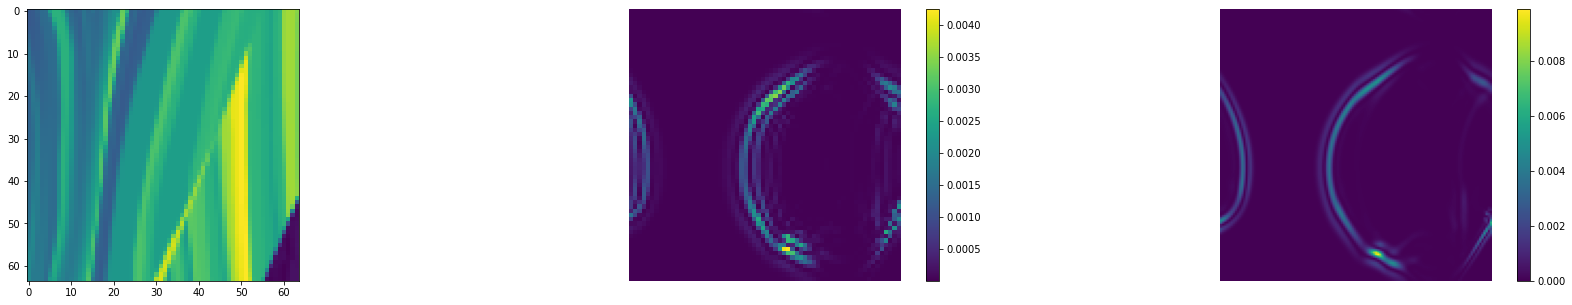

14 ------------------------------------------------------------------------------------------------------------------------------------------------------


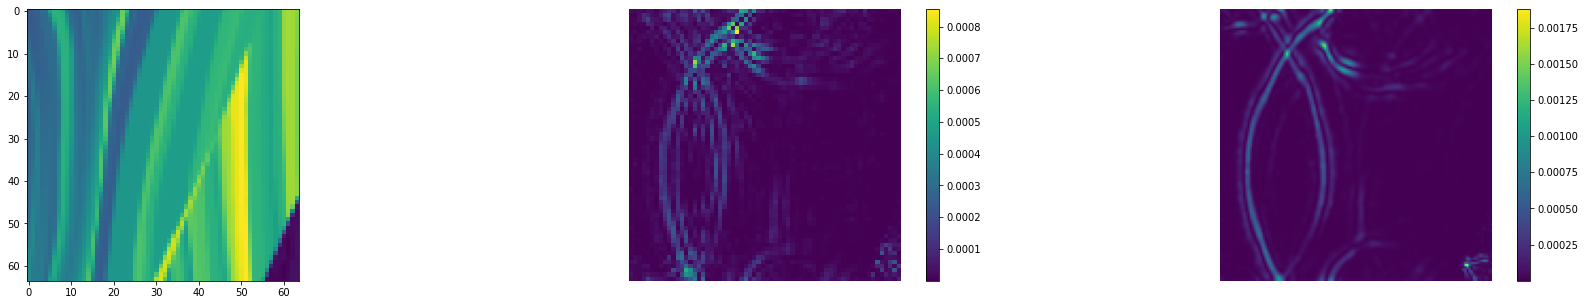

15 ------------------------------------------------------------------------------------------------------------------------------------------------------


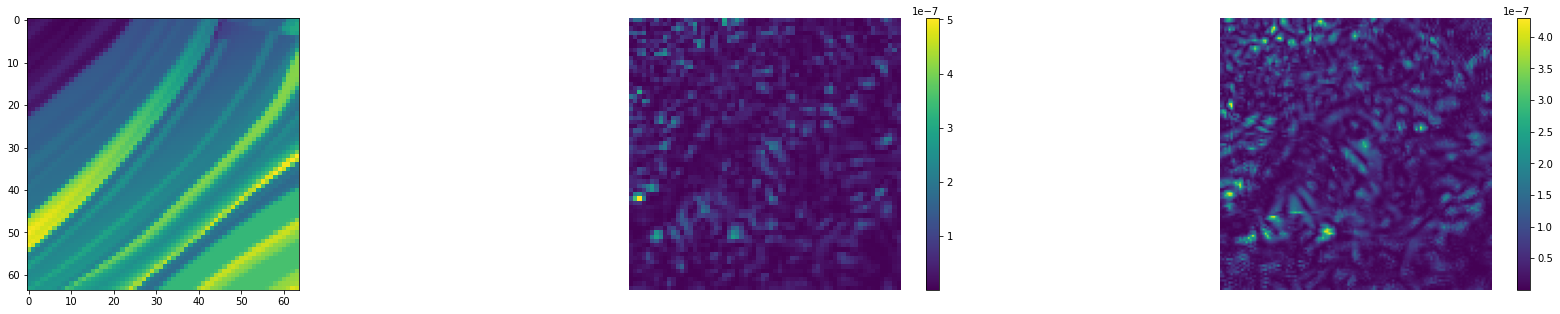

16 ------------------------------------------------------------------------------------------------------------------------------------------------------


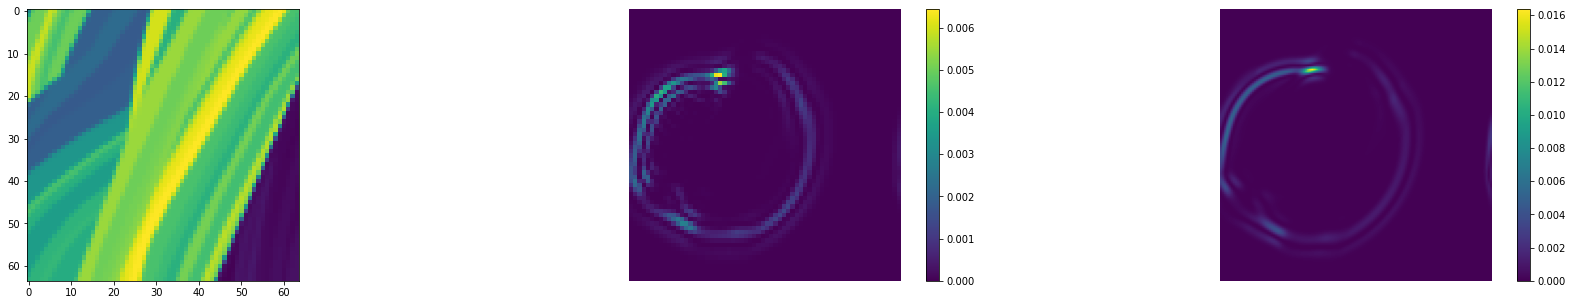

17 ------------------------------------------------------------------------------------------------------------------------------------------------------


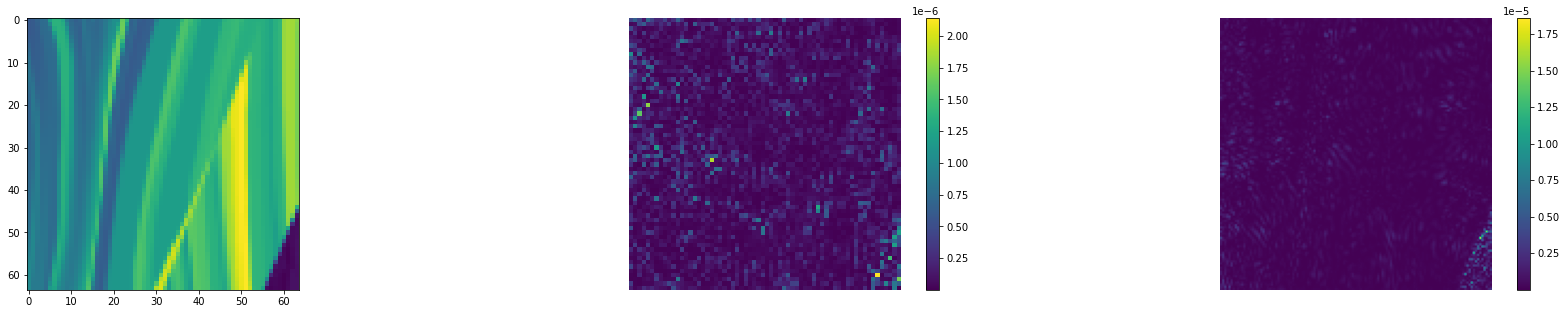

18 ------------------------------------------------------------------------------------------------------------------------------------------------------


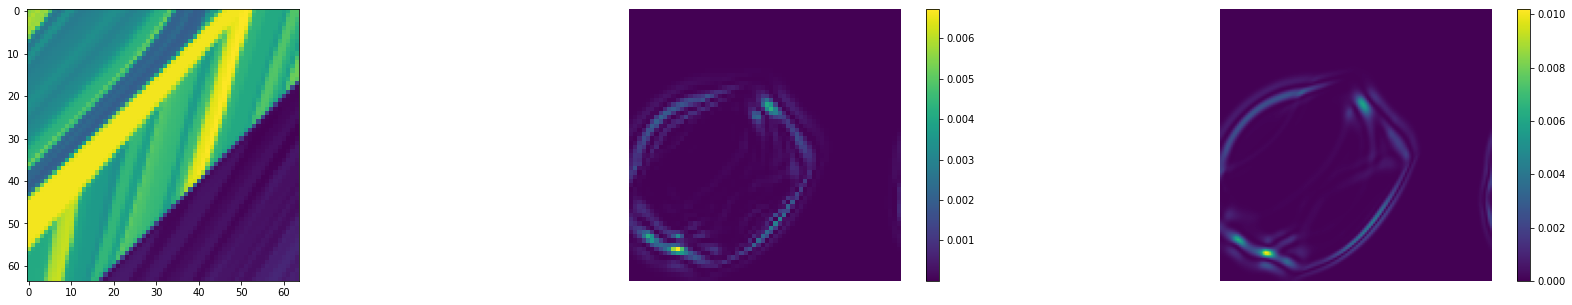

19 ------------------------------------------------------------------------------------------------------------------------------------------------------


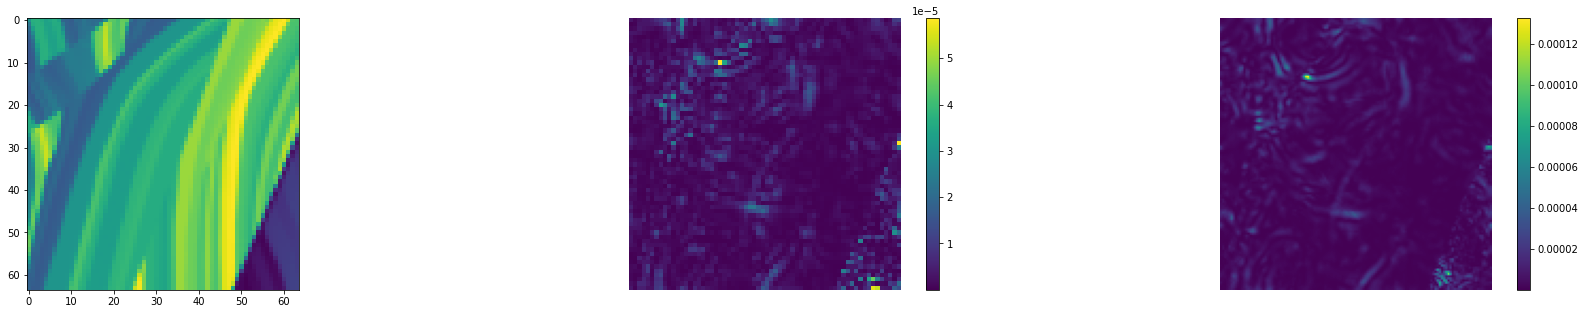

20 ------------------------------------------------------------------------------------------------------------------------------------------------------


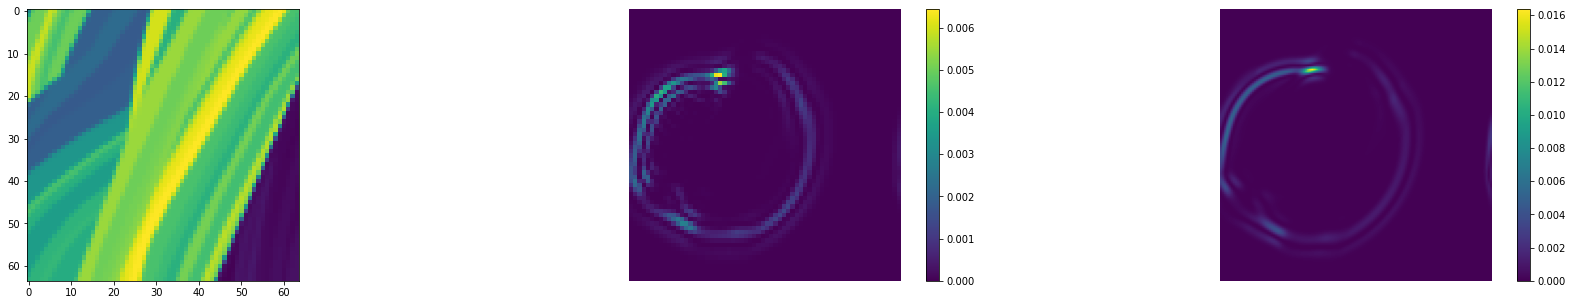

21 ------------------------------------------------------------------------------------------------------------------------------------------------------


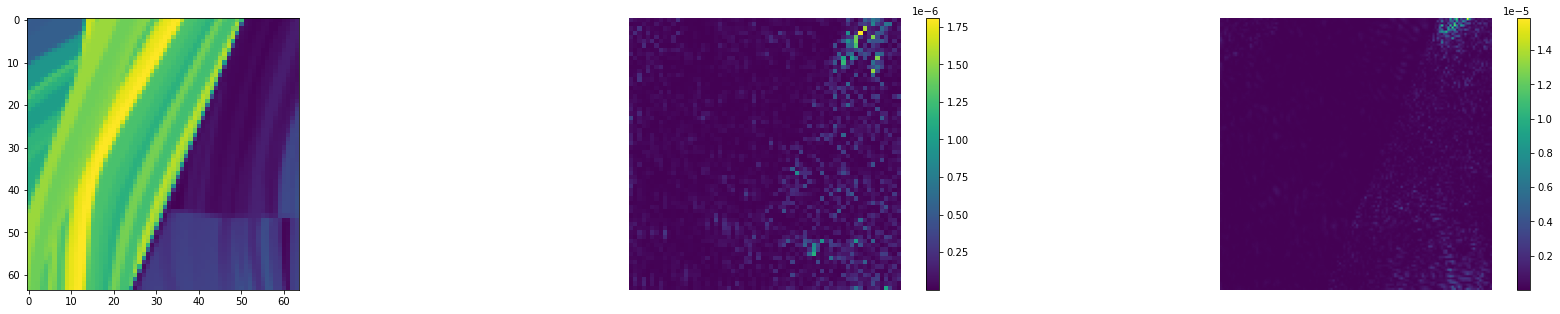

22 ------------------------------------------------------------------------------------------------------------------------------------------------------


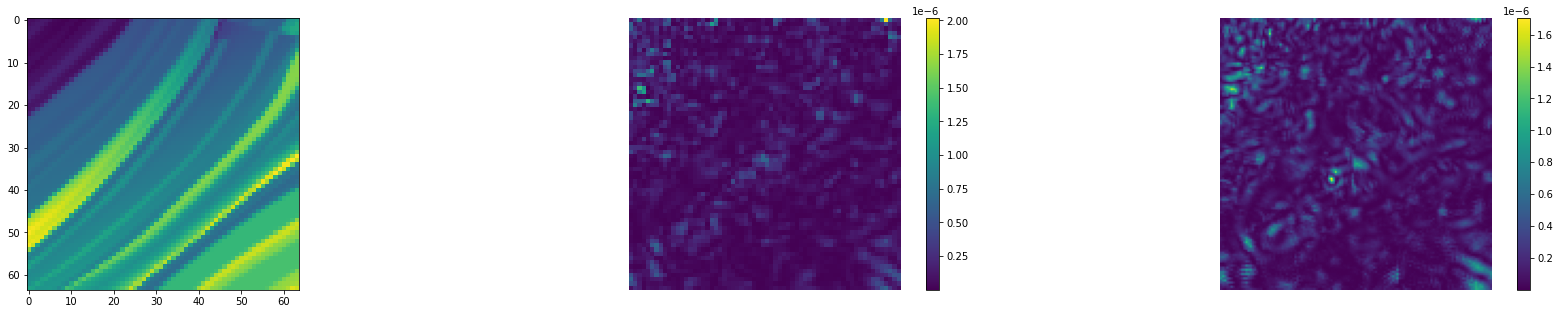

23 ------------------------------------------------------------------------------------------------------------------------------------------------------


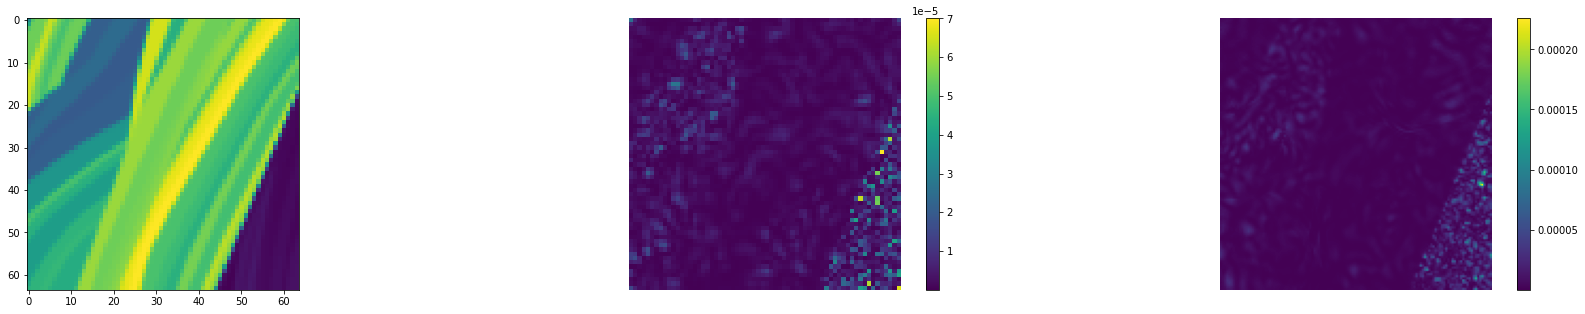

24 ------------------------------------------------------------------------------------------------------------------------------------------------------


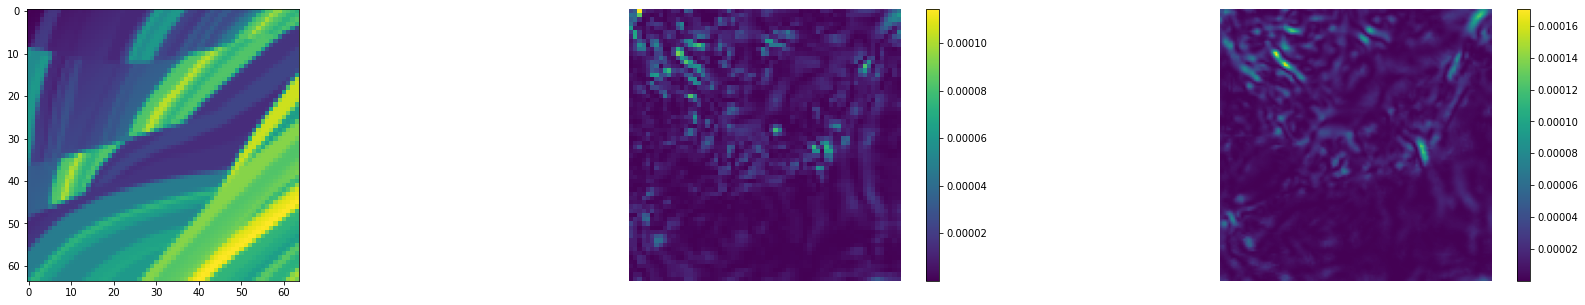

25 ------------------------------------------------------------------------------------------------------------------------------------------------------


KeyboardInterrupt: 

In [19]:
for loader in loaders:
    for i, data in enumerate(loader):
        print(i, "-"*150)

        input, label = data # b x ch x w x h

        fig = plt.figure(figsize=(30,5))



        #vis velocity profile
        ax1 = fig.add_subplot(1,3,1)
        pos1 = ax1.imshow(input[0, 3, :, :])

        #input vis
        u_x, u_y, u_t_c, vel = input[:, 0, :, :], input[:, 1, :, :], input[:, 2, :, :], input[:, 3, :, :]
        sumv = torch.sum(torch.sum(u_x))
        u, ut = wave_util.WaveSol_from_EnergyComponent_tensor(u_x, u_y, u_t_c, vel, dx, sumv)
        ax2 = fig.add_subplot(1,3,2)
        pos2 = ax2.imshow(wave_util.WaveEnergyField_tensor(u[0,:,:],ut[0,:,:],vel[0,:,:],dx)*dx*dx)
        plt.colorbar(pos2)
        plt.axis('off')

        #vis label
        ax3 = fig.add_subplot(1,3,3)
        u_x, u_y, u_t_c = label[:, 0, :, :], label[:, 1, :, :], label[:, 2, :, :]
        sumv = torch.sum(torch.sum(u_x))
        vel_big = F.upsample(vel.unsqueeze(dim=0), size=(128, 128), mode='bilinear')
        vel_big = vel_big.squeeze().unsqueeze(dim=0)
        u, ut = wave_util.WaveSol_from_EnergyComponent_tensor(u_x, u_y, u_t_c, vel_big, dx, sumv)
        pos3 = ax3.imshow(wave_util.WaveEnergyField_tensor(u[0,:,:],ut[0,:,:],vel_big[0,:,:],dx)*dx*dx)
        plt.colorbar(pos3)
        plt.axis('off')

        plt.show()